# UK Bar Charts and Trend Lines

In [10]:
!pip install pyarrow
!pip install datetime

In [27]:
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.style.use('ggplot')

In [28]:
data_dir  = '../Datasets/' 
agg_file  = 'agg_data_2020-04-08.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'data_UK.csv'.format(datetime.date(datetime.now()))

COUNTRY = 'Uk'

print(trend_file)

agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

image_dir = '../Images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

data_UK.csv


In [29]:
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

In [30]:
def create_title(fig_title, country):
    if country:
        return fig_title + ' for ' + country
    else:
        return fig_title
    
def create_save_file(col, country, graph_type):
    if country:
        return '{}_{}_{}.png'.format(country, col, graph_type)
    else:
        return '{}_{}.png'.format(col, graph_type)

In [31]:
def create_trend_line(tmp_df, col, col2, col3, fig_title, country):
    fig, ax = plt.subplots(figsize=(15,8))
    tmp_df.groupby(['date'])[[col, col2, col3]].sum().plot(ax=ax, marker='o')
    ax.set_title(create_title(fig_title, country))
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'trendline')))
    
def create_bar(tmp_df, col, rgb, country):
    fig, ax = plt.subplots(figsize=(15,8))
    tmp = tmp_df.head(30).groupby(['date'])[[col]].sum()
    ax.set_title(create_title(col, country))
    tmp.plot.bar(ax=ax, rot=45, color=rgb)
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'bar')))
    
    
def create_stacked_bar(tmp_df, col1, col2, fig_title, country):
    tmp_df = tmp_df.set_index('date')
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_title(create_title(fig_title, country))
    tmp_df[[col2, col1]].plot.bar(ax=ax,
                                  rot=45,
                                  stacked=True);
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col2, country, 'stacked_bar')))

# Accumulative trend lines of confirmed cases, deaths and recovered cases

Creating graphs...
... Time Series Trend Line


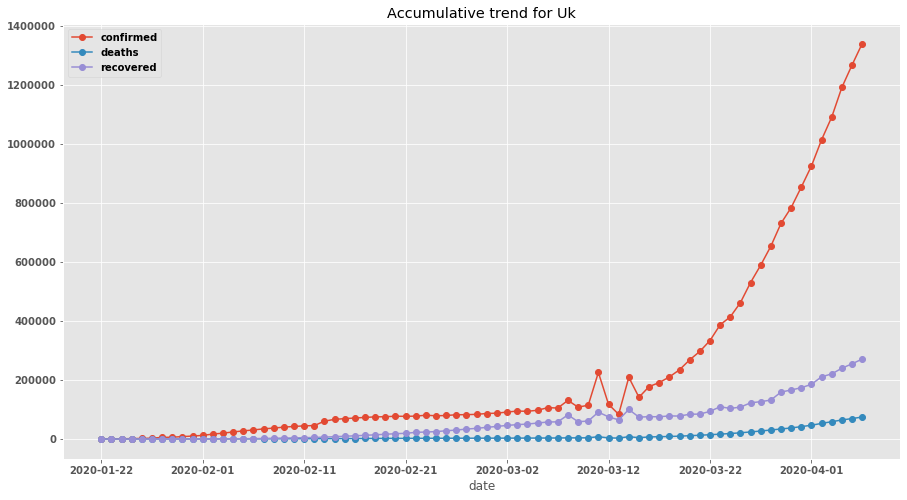

In [32]:
print('Creating graphs...')
print('... Time Series Trend Line')
create_trend_line(agg_df, 'confirmed', 'deaths', 'recovered', 'Accumulative trend', COUNTRY)

# Bar Charts and Trend Lines

Throughout the following charts it is possible to analise the new confirmed cases, new deaths, new recoveries and curretly infected cases represented in bar charts. It is also presented a daily trendline with the new confirmed cases, new deaths and new recoveries of UK and a stacked bar with the confirmed and new cases by day.

... Daily Figures
... Daily New Infections Differences


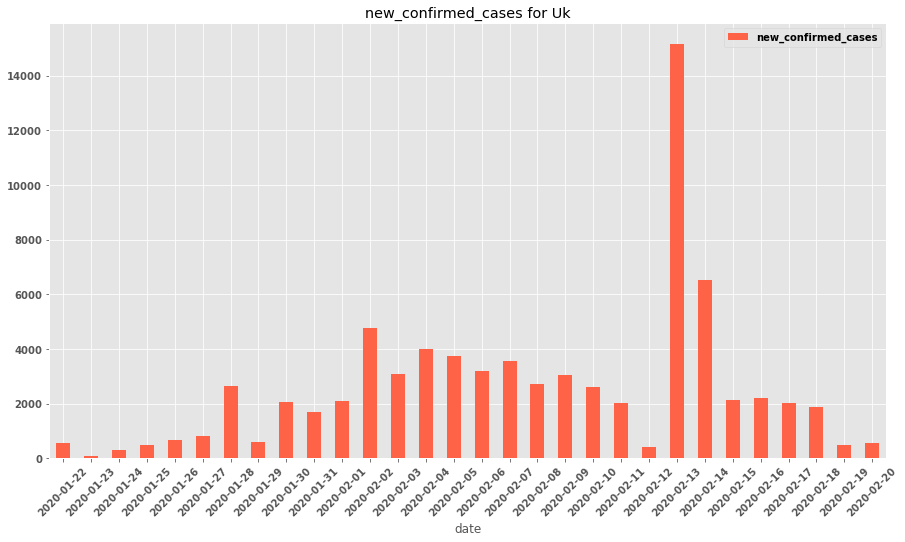

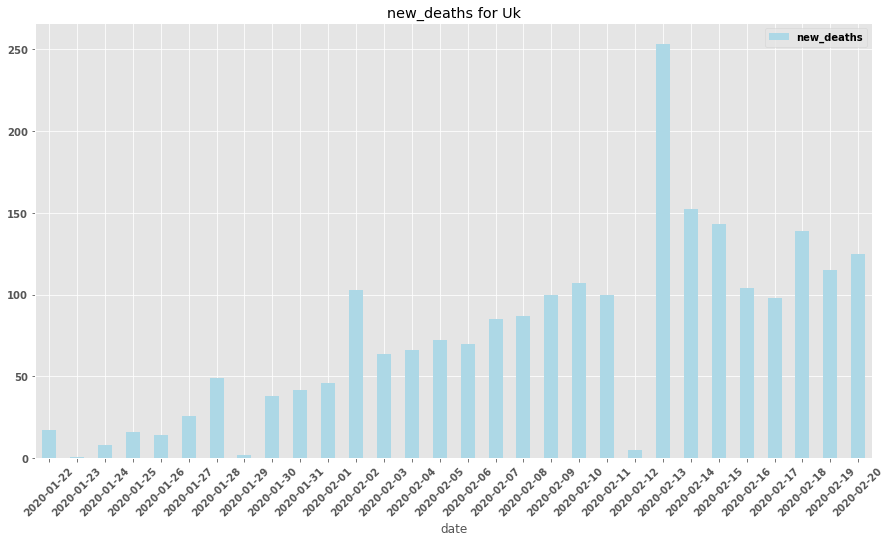

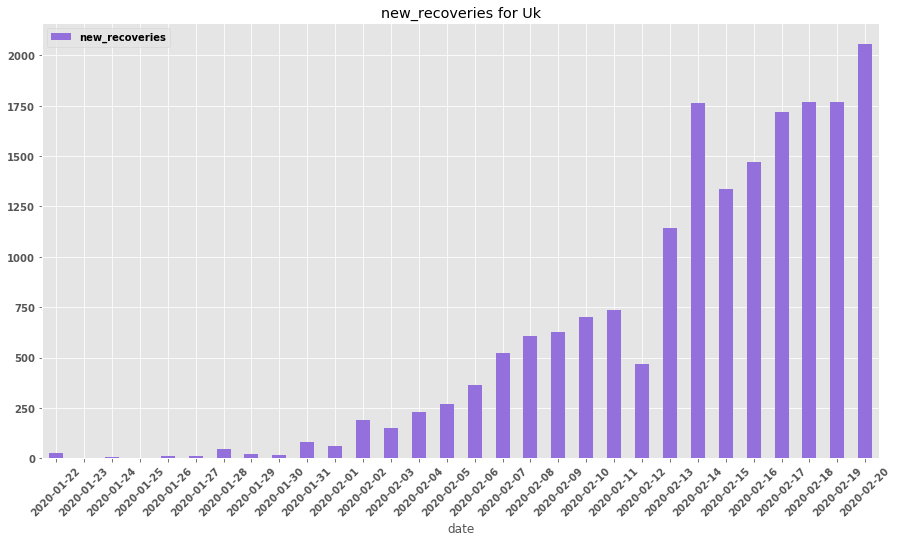

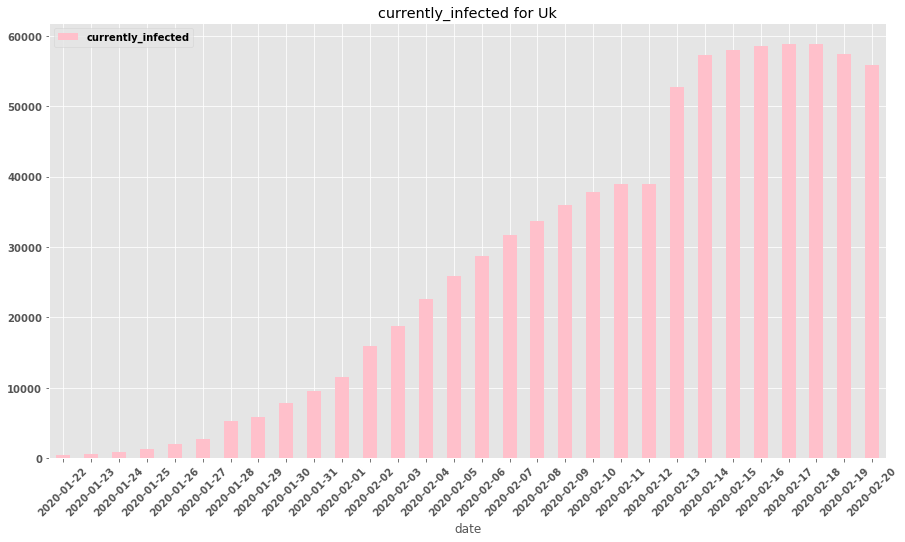

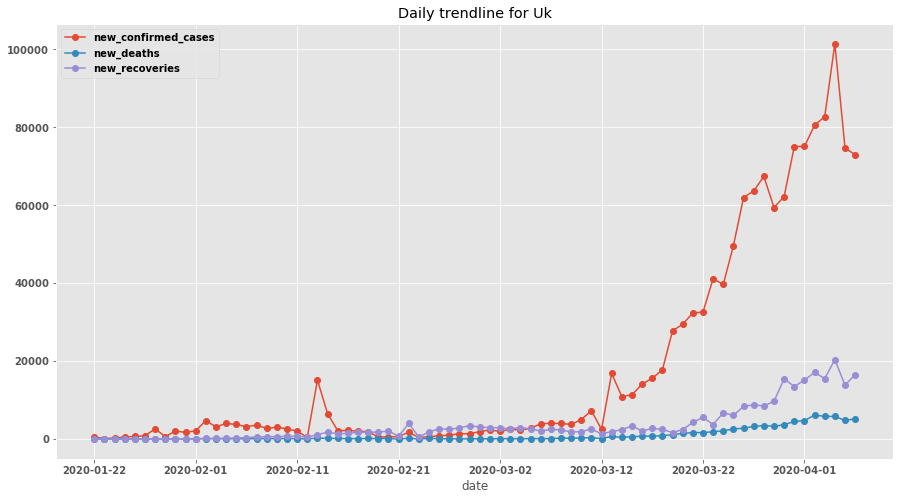

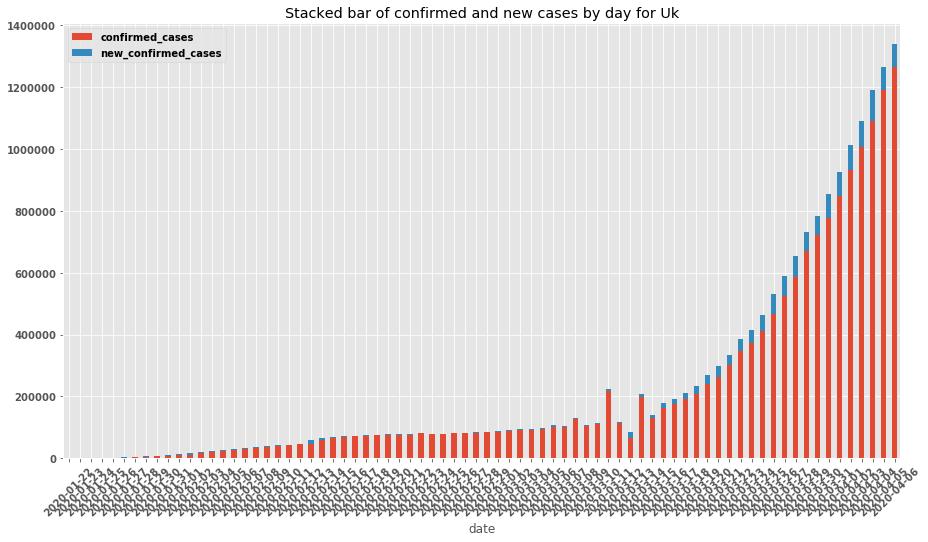

In [34]:
print('... Daily Figures')
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries', 'currently_infected']
for col, rgb in zip (daily_figures_cols, ['tomato', 'lightblue', 'mediumpurple', 'pink']):
    create_bar(daily_df, col, rgb, COUNTRY)    
    
create_trend_line(daily_df, 'new_confirmed_cases', 'new_deaths', 'new_recoveries', 'Daily trendline', COUNTRY)

print('... Daily New Infections Differences')
new_df = pd.DataFrame([])
new_df['date'] = daily_df['date']
new_df['confirmed_cases'] = agg_df.groupby(['date']).confirmed.sum().values - daily_df.new_confirmed_cases
new_df['new_confirmed_cases'] = daily_df.new_confirmed_cases
create_stacked_bar(new_df, 'new_confirmed_cases', 'confirmed_cases', "Stacked bar of confirmed and new cases by day", COUNTRY)

# Table with new confirmed cases, new deaths, new recoveries, currently infected and cumulative cases of UK

In [35]:
daily_df

,Unnamed: 0,day,date,new_confirmed_cases,new_deaths,new_recoveries,cumulative_cases,currently_infected,delta
0,0,0,2020-01-22,555,17,28,555,510,-45
1,1,1,2020-01-23,98,1,2,653,605,-48
2,2,2,2020-01-24,288,8,6,941,879,-62
3,3,3,2020-01-25,497,16,3,1438,1357,-81
4,4,4,2020-01-26,680,14,13,2118,2010,-108
...,...,...,...,...,...,...,...,...,...
71,71,71,2020-04-02,80552,6174,17086,1013157,749911,-263246
72,72,72,2020-04-03,82760,5804,15533,1095917,811334,-284583
73,73,73,2020-04-04,101488,5819,20356,1197405,886647,-310758
74,74,74,2020-04-05,74710,4768,13860,1272115,942729,-329386
